In [1]:
import sys
sys.path.append('/Users/mariana/Documents/projects/Graphs/egnn')

In [2]:
from ae_datasets import d_selector, Dataloader
from ae_datasets.d_creator import max_n_nodes, DatasetCommunity, DatasetErdosRenyiNodes
import graph as gl

In [3]:
import networkx as nx

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
dataset_name = 'community_ours'

In [7]:
dataset = d_selector.retrieve_dataset(dataset_name, K=2, with_pos=True, n_nodes=10, directed=True)

Creating dataset with  2  communities


In [34]:
dataset = DatasetCommunity(partition='train', n_nodes=10, with_pos=True, K=2)

Creating dataset with  2  communities


In [16]:
loader = Dataloader(dataset)

In [17]:
batch = next(iter(loader))

In [35]:
dataset.graphs[29].pos

{0: array([-0.28505213, -1.        ]),
 1: array([-0.18763899, -0.69932536]),
 2: array([-0.50824144, -0.91058988]),
 3: array([-0.11111814, -0.23415637]),
 4: array([-0.37524684, -0.6256424 ]),
 5: array([0.07055266, 0.68103575]),
 6: array([0.40783869, 0.64973733]),
 7: array([0.12433347, 0.35276886]),
 8: array([0.58570995, 0.97791266]),
 9: array([0.27886277, 0.80825942])}

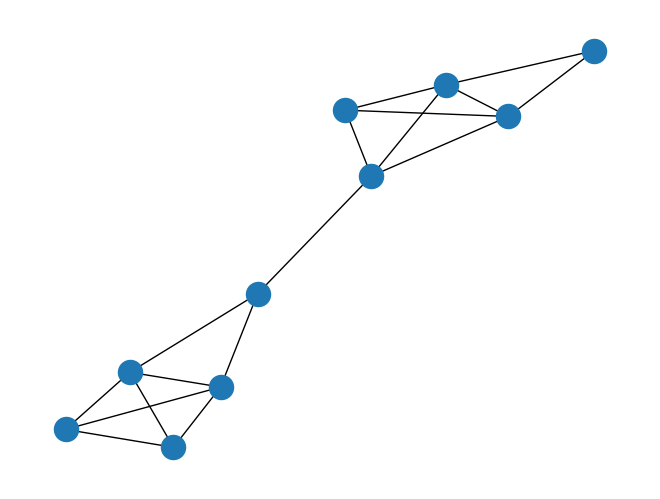

In [23]:
gl.plot_graph(dataset.graphs[29])

In [9]:
def laplacian(adj):
    return np.diag(adj.sum(1)) - adj

In [36]:
adjs = []
for graph in dataset.graphs:
    _, _, _, adj_gt = graph.get_dense_graph(store=True, loops=False)
    adjs.append(adj_gt.numpy())

In [37]:
laps = []
for adj in adjs:
    laps.append(laplacian(adj))

In [38]:
len(adjs)
len(laps)

5000

In [39]:
laps[90] == laps[190]

array([[ True,  True, False,  True,  True, False,  True,  True, False,
        False],
       [ True, False,  True, False,  True,  True,  True,  True,  True,
         True],
       [False,  True, False,  True,  True,  True,  True,  True,  True,
         True],
       [ True, False,  True,  True, False,  True,  True,  True, False,
        False],
       [ True,  True,  True, False, False,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True, False,  True, False, False,
         True],
       [ True,  True,  True,  True,  True,  True, False,  True, False,
         True],
       [ True,  True,  True,  True,  True, False,  True, False,  True,
         True],
       [False,  True,  True, False,  True, False, False,  True,  True,
         True],
       [False,  True,  True, False,  True,  True,  True,  True,  True,
        False]])

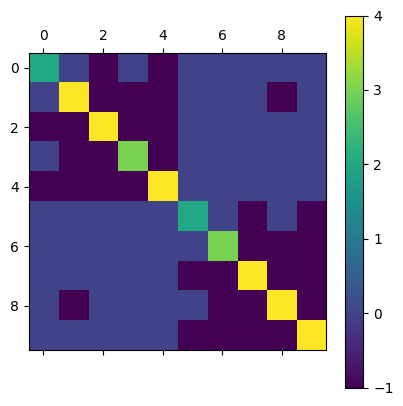

In [41]:
plt.matshow(laps[110])
plt.colorbar()

In [46]:
graph_nx = gl.graph2networkx(dataset.graphs[0])
l2 = nx.laplacian_matrix(graph_nx)

In [56]:
l3 = np.diag(a.sum(1)) - a

In [60]:
l3 == l2

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [47]:
l2 = l2.toarray()
l2

array([[ 3, -1, -1, -1,  0,  0,  0,  0,  0,  0],
       [-1,  4, -1,  0, -1, -1,  0,  0,  0,  0],
       [-1, -1,  3,  0,  0, -1,  0,  0,  0,  0],
       [-1,  0,  0,  3,  0,  0, -1, -1,  0,  0],
       [ 0, -1,  0,  0,  2, -1,  0,  0,  0,  0],
       [ 0, -1, -1,  0, -1,  3,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  4, -1, -1, -1],
       [ 0,  0,  0, -1,  0,  0, -1,  4, -1, -1],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  2,  0],
       [ 0,  0,  0,  0,  0,  0, -1, -1,  0,  2]])

In [51]:
a = nx.adj_matrix(graph_nx)
a = a.toarray()
a

/var/folders/gy/r509yr655150tg12h1t9h_tr0000gn/T/ipykernel_35939/3640487693.py:1: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  a = nx.adj_matrix(graph_nx)
/Users/mariana/.Envs/molgen/lib/python3.10/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])

In [118]:
J = np.ones_like(L) * 0.1

In [126]:
val.round(1)

array([-0. ,  0.2,  5.4,  5. ,  4.5,  3.6,  1.7,  2.6,  2. ,  5. ],
      dtype=float32)

In [136]:
L2 = L + J
val2, vec2 = np.linalg.eig(L2)

In [137]:
val2.round(1)

array([5.4, 0.2, 4.5, 1. , 3.6, 1.7, 2.6, 5. , 5. , 2. ], dtype=float32)

In [139]:
val2.sort()
val2

array([0.2183465, 1.       , 1.7126641, 1.9999999, 2.5857863, 3.5524094,
       4.5165796, 5.       , 5.       , 5.4142137], dtype=float32)

In [140]:
val.sort()

In [143]:
val.round(1)

array([-0. ,  0.2,  1.7,  2. ,  2.6,  3.6,  4.5,  5. ,  5. ,  5.4],
      dtype=float32)

In [144]:
val2.round(1)

array([0.2, 1. , 1.7, 2. , 2.6, 3.6, 4.5, 5. , 5. , 5.4], dtype=float32)

In [43]:
L = np.diag(A.numpy().sum(1)) - A.numpy()

In [131]:
val, vec = np.linalg.eig(L)

In [132]:
val.round(1)

array([-0. ,  0.2,  5.4,  5. ,  4.5,  3.6,  1.7,  2.6,  2. ,  5. ],
      dtype=float32)

In [95]:
vec.shape

(10, 10)

In [96]:
np.matmul(vec.T, vec).round(2)

array([[ 1.  , -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ,  0.  ,
         0.  ],
       [-0.  ,  1.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,
         0.  ],
       [-0.  , -0.  ,  1.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        -0.11],
       [-0.  ,  0.  , -0.  ,  0.  ,  1.  ,  0.  , -0.  , -0.  , -0.  ,
        -0.  ],
       [-0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , -0.  ,  0.  ,
        -0.  ],
       [ 0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  1.  , -0.  ,  0.  ,
         0.  ],
       [-0.  , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,  1.  , -0.  ,
        -0.  ],
       [ 0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  ,  1.  ,
        -0.  ],
       [ 0.  ,  0.  ,  0.  , -0.11, -0.  , -0.  ,  0.  , -0.  , -0.  ,
         1.  ]], dtype=float32)

In [97]:
aux = (vec @ np.diag(val) @ vec.T)

In [111]:
aux2 = (vec[:,:7] @ np.diag(val[:7]) @ vec[:,:7].T)

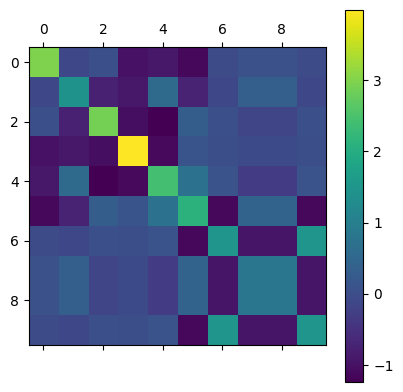

In [112]:
# plt.matshow(L)
plt.matshow(aux2)
plt.colorbar()